# classification

In [2]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
import livelossplot
from livelossplot import PlotLossesKerasTF

In [3]:
data=pd.read_csv("gold fund.csv")

In [4]:
data.head(1)

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0


In [5]:
x=data.iloc[:,1:-1]
y=data.Gold_Fund

In [6]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

# standardise data
from sklearn.preprocessing import StandardScaler
stdSc=StandardScaler()
stdSc.fit(x_train)
x_train_std=stdSc.transform(x_train)
x_test_std=stdSc.transform(x_test)

In [7]:
y_train.value_counts()/y_train.size

0    0.914504
1    0.085496
Name: Gold_Fund, dtype: float64

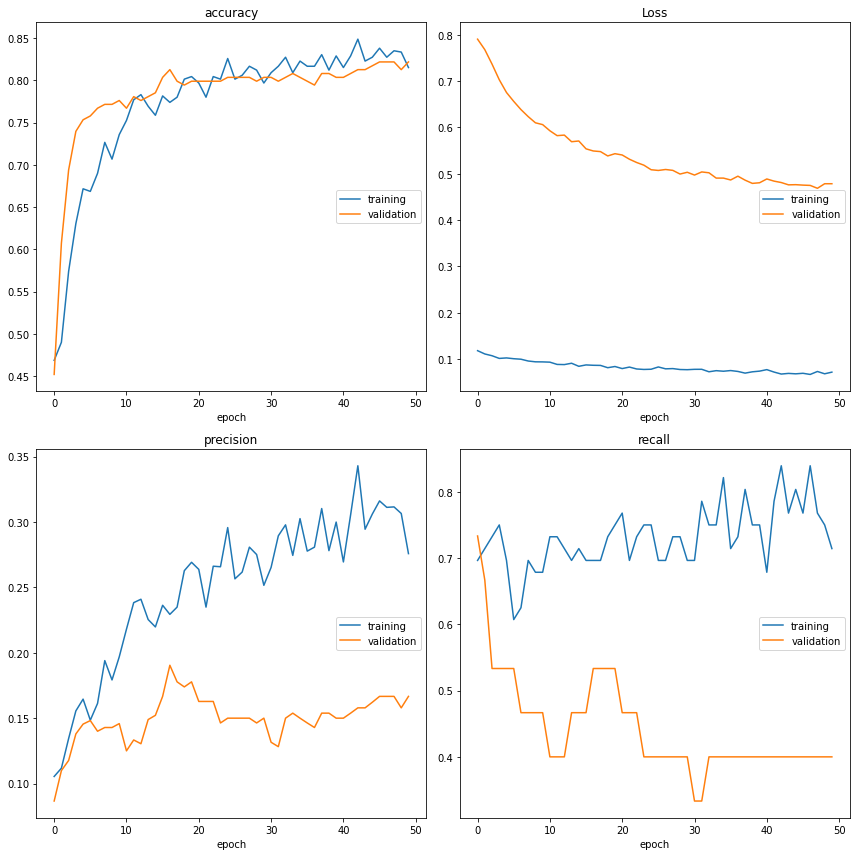

accuracy
	training         	 (min:    0.469, max:    0.849, cur:    0.815)
	validation       	 (min:    0.452, max:    0.822, cur:    0.822)
Loss
	training         	 (min:    0.067, max:    0.118, cur:    0.072)
	validation       	 (min:    0.469, max:    0.791, cur:    0.479)
precision
	training         	 (min:    0.105, max:    0.343, cur:    0.276)
	validation       	 (min:    0.087, max:    0.190, cur:    0.167)
recall
	training         	 (min:    0.607, max:    0.839, cur:    0.714)
	validation       	 (min:    0.333, max:    0.733, cur:    0.400)
21/21 [==============================] - 1s 37ms/step - loss: 0.0720 - accuracy: 0.8153 - precision: 0.2759 - recall: 0.7143 - val_loss: 0.4786 - val_accuracy: 0.8219 - val_precision: 0.1667 - val_recall: 0.4000


In [8]:
from tensorflow.keras.metrics import Precision, Recall

goldModel=Sequential()
goldModel.add(Dense(10,activation="relu"))#h1
goldModel.add(BatchNormalization())
goldModel.add(Dense(10,activation="relu"))#h2
goldModel.add(BatchNormalization())
goldModel.add(Dense(1,activation="sigmoid"))#output
goldModel.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

goldModel.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test),class_weight={0:0.1,1:0.9})

In [9]:
goldModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                160       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 321
Non-trainable pa